In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mth
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def euclidian_distance(x, y, centroid_x, centroid_y):
    dist = mth.sqrt((x-centroid_x)**2 + (y - centroid_y)**2)
    return dist

def assign_cluster(C1X, C1Y, C2X, C2Y, data):
    newdata = pd.DataFrame([])
    i = 0
    if(len(data['x']) != len(data['y'])):
        raise Exception('There seems to be missing entries in the data! The columns do not have the same length!')
        
    while i < len(data['x']):
        e_dist_C1 = euclidian_distance(data['x'][i], data['y'][i], C1X, C1Y)
        e_dist_C2 = euclidian_distance(data['x'][i], data['y'][i], C2X, C2Y)
        if e_dist_C1 < e_dist_C2:
            ass_cluster = 'C1'
        else:
            ass_cluster = 'C2'
        newdata = newdata.append({
            'DataPoint_x' : data['x'][i],
            'DataPoint_y' : data['y'][i],
            'e_dist_C1' : e_dist_C1,
            'e_dist_C2' : e_dist_C2,
            'Assigned_Cluster' : ass_cluster
            }, ignore_index=True)
        i += 1
    newdata = newdata[['DataPoint_x', 'DataPoint_y', 'e_dist_C1', 'e_dist_C2', 'Assigned_Cluster']]
    
    return newdata

def mean(x):
    return round((sum(x) / len(x)), 2)

def calc_new_centroid(ass_cluster):
    i = 0
    cluster1_x = []
    cluster1_y = []
    cluster2_x = []
    cluster2_y = []
    while i < len(ass_cluster.index):
        if ass_cluster['Assigned_Cluster'][i] == 'C1':
            cluster1_x.append(ass_cluster['DataPoint_x'][i])
            cluster1_y.append(ass_cluster['DataPoint_y'][i])
        else:
            cluster2_x.append(ass_cluster['DataPoint_x'][i])
            cluster2_y.append(ass_cluster['DataPoint_y'][i])
        i += 1

    return mean(cluster1_x), mean(cluster1_y), mean(cluster2_x), mean(cluster2_y)


def do_label(cluster):
    j = 0
    labels = []
    while (j < len(cluster["Assigned_Cluster"])):
        if (cluster["Assigned_Cluster"][j] == 'C1'):
            labels.append(0)
        else:
            labels.append(1)
        j += 1
    return labels

def do_cluster(in_data):
    centroid1_x = in_data['x'][0]
    centroid1_y = in_data['y'][0]
    centroid2_x = in_data['x'][1]
    centroid2_y = in_data['y'][1]

    while True:
        ac = assign_cluster(centroid1_x, centroid1_y, centroid2_x, centroid2_y, in_data)
        new_centroid1_x, new_centroid1_y, new_centroid2_x, new_centroid2_y = calc_new_centroid(ac)
        
        labels = do_label(ac)
        
        plt.scatter(ac['DataPoint_x'], ac['DataPoint_y'], c=labels, cmap='rainbow') 
        plt.scatter([new_centroid1_x, new_centroid2_x] ,[new_centroid1_y, new_centroid2_y],  s= 100, color='green')
        plt.show()
        if ((centroid1_x == new_centroid1_x) and (centroid1_y == new_centroid1_y) and (centroid2_x == new_centroid2_x) and (centroid2_y == new_centroid2_y)):
            break
        else:
            centroid1_x = new_centroid1_x
            centroid1_y = new_centroid1_y
            centroid2_x = new_centroid2_x
            centroid2_y = new_centroid2_y
        
    return new_centroid1_x, new_centroid1_y, new_centroid2_x, new_centroid2_y, ac

# K-Means Clustering

## Wikipedia Definition of K-Mean Clustering

### **k-means clustering** is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

### It is an Unsupervised Learning, i.e. the model that does NOT know the Actual Prediction. It explores the data and tries to find a pattern in the data and learns from the pattern

###  K-Means Clustering can be defined as the task of 
* #### Identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. 
* #### It is the process of finding homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure 
* #### Similarity Measures can be  (a) An Euclidean-based distance or (b) correlation-based distance. 
* #### We will use the Euclidian Distance as our Similarity Measure

## How Does K-Means Clustering Work

* Specify number of clusters K.
* Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement. Call this the **Current Centroid**
* Assign each data point to the closest cluster (centroid).
* Re-compute the Centroid for each cluster by calculating the **x_mean** and **y-mean** of all the data points in the cluster. Call this the **New Centroid** (for each cluster).
* If **New Centriod** is different from the **Current Centroid**, set **Current Centroid** = **New Centroid** and keep iterating until **New Centroid** == **Current Centroid**,  i.e assignment of data points to clusters isn’t changing.

## Choosing the value of K

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE). Like this:

var sse = {};

for (var k = 1; k <= maxK; ++k) {

    sse[k] = 0;
    clusters = kmeans(dataset, k);
    clusters.forEach(function(cluster) {
        mean = clusterMean(cluster);
        cluster.forEach(function(datapoint) {
            sse[k] += Math.pow(datapoint - mean, 2);
        });
    });
}

Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

**The figure below shows the Distortion Score for various K values. Looks like K = 8 is a best value of K**

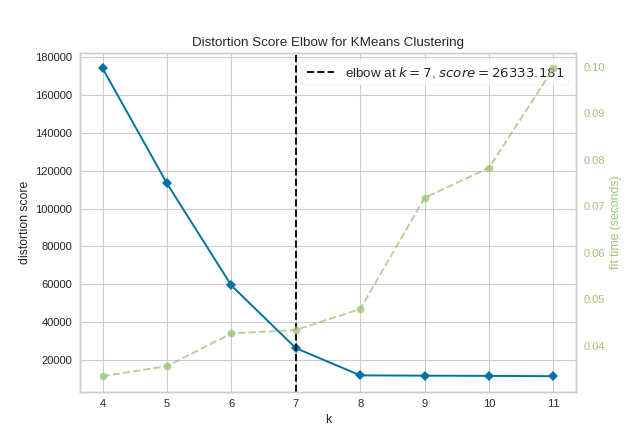


## The Python functions to be developed are

* ### euclidian_distance --- Calculates the Euclidian Distance between two points (x1, y1) and (x2, y2)

* ### assign_cluster --- selects K (2 in our case) arbitrary centrois and assigns each data point to one the K (2 in our case) clusters

* ### calc_new_centroid --- calculates the new_centroid as the (x_mean, y_mean) of the points in each cluster as assigned in the assign_cluster function

* ### do_cluster --- iterates while the new_cluster != current_cluster. Draws the cluster data points and their centroid for each iteration starting with the orginal data set (before clustering)

In [3]:
data = pd.DataFrame({'x' :[5, 10, 15, 24, 30, 55, 60, 71, 80,85], 'y' : [3, 15, 12, 10, 45, 52, 78, 80, 91, 70]})

In [4]:
data.head(10)

x   y
0   5   3
1  10  15
2  15  12
3  24  10
4  30  45
5  55  52
6  60  78
7  71  80
8  80  91
9  85  70

## Initial Clustering with arbitrary centroid

In [5]:
ac1 = assign_cluster(data['x'][0], data['x'][1], data['y'][0], data['y'][1], data)

In [6]:
ac1.head(10)

DataPoint_x  DataPoint_y   e_dist_C1   e_dist_C2 Assigned_Cluster
0          5.0          3.0    7.000000   12.165525               C1
1         10.0         15.0    7.071068    7.000000               C2
2         15.0         12.0   10.198039   12.369317               C1
3         24.0         10.0   19.000000   21.587033               C1
4         30.0         45.0   43.011626   40.360872               C2
5         55.0         52.0   65.299311   63.820060               C2
6         60.0         78.0   87.458562   84.958814               C2
7         71.0         80.0   96.208108   94.069124               C2
8         80.0         91.0  110.390217  108.189648               C2
9         85.0         70.0  100.000000   98.737024               C2

## Iteration - 2

In [7]:
centroid1_x, centroid1_y, centroid2_x, centroid2_y = calc_new_centroid(ac1)

In [8]:
ac2 = assign_cluster(centroid1_x, centroid1_y, centroid2_x, centroid2_y, data)

In [9]:
ac2.head(10)

DataPoint_x  DataPoint_y   e_dist_C1  e_dist_C2 Assigned_Cluster
0          5.0          3.0   11.041639  77.570513               C1
1         10.0         15.0    8.142346  65.359808               C1
2         15.0         12.0    3.684807  64.239587               C1
3         24.0         10.0    9.478280  60.617856               C1
4         30.0         45.0   39.745412  30.713263               C2
5         55.0         52.0   59.443905   9.608564               C2
6         60.0         78.0   83.118697  16.943568               C2
7         71.0         80.0   91.157324  23.851300               C2
8         80.0         91.0  105.367632  38.063953               C2
9         85.0         70.0   93.538750  30.334873               C2

## Iteration - 3

In [10]:
centroid1_x, centroid1_y, centroid2_x, centroid2_y = calc_new_centroid(ac2)

In [11]:
ac3 = assign_cluster(centroid1_x, centroid1_y, centroid2_x, centroid2_y, data)

In [12]:
ac3.head(10)

DataPoint_x  DataPoint_y   e_dist_C1  e_dist_C2 Assigned_Cluster
0          5.0          3.0   11.011358  88.441613               C1
1         10.0         15.0    6.103278  76.249583               C1
2         15.0         12.0    2.500000  75.093135               C1
3         24.0         10.0   10.500000  71.276216               C1
4         30.0         45.0   38.694315  41.402885               C1
5         55.0         52.0   59.044475  19.302303               C2
6         60.0         78.0   82.378699   9.349807               C2
7         71.0         80.0   90.588355  13.042197               C2
8         80.0         91.0  104.801002  27.236720               C2
9         85.0         70.0   93.339434  21.510437               C2

## Iteration - 4

In [13]:
centroid1_x, centroid1_y, centroid2_x, centroid2_y = calc_new_centroid(ac3)

In [14]:
ac4 = assign_cluster(centroid1_x, centroid1_y, centroid2_x, centroid2_y, data)

In [15]:
ac4.head(10)

DataPoint_x  DataPoint_y  e_dist_C1  e_dist_C2 Assigned_Cluster
0          5.0          3.0  18.309560  96.542633               C1
1         10.0         15.0   7.088018  84.431511               C1
2         15.0         12.0   5.314132  83.161770               C1
3         24.0         10.0  10.041912  79.095385               C1
4         30.0         45.0  30.955452  49.685813               C1
5         55.0         52.0  51.809652  26.905018               C2
6         60.0         78.0  74.747843  10.884852               C2
7         71.0         80.0  83.106197   5.854912               C2
8         80.0         91.0  97.315158  19.449422               C2
9         85.0         70.0  86.372681  15.384408               C2

In [16]:
centroid1_x, centroid1_y, centroid2_x, centroid2_y = calc_new_centroid(ac4)

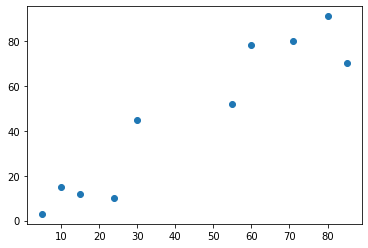

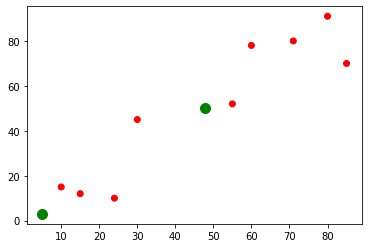

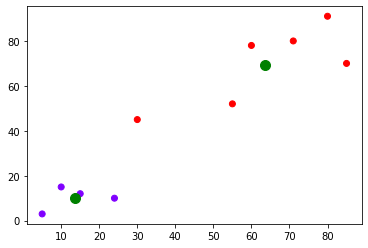

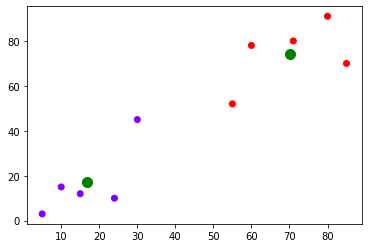

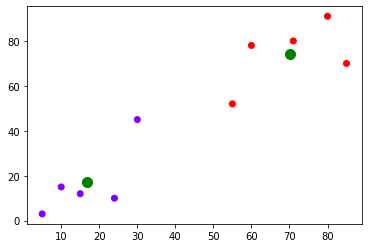

In [17]:
my_data = pd.DataFrame({'x' :[5, 10, 15, 24, 30, 55, 60, 71, 80,85], 'y' : [3, 15, 12, 10, 45, 52, 78, 80, 91, 70]})

plt.scatter(my_data['x'],my_data['y'], label='True Position') 
plt.show()
c1_x, c1_y, c2_x, c2_y, clustered_data = do_cluster(my_data)


In [18]:
from sklearn.cluster import KMeans 

KMeans(n_clusters=2)

[[16.8 17. ]
 [70.2 74.2]]
[0 0 0 0 0 1 1 1 1 1]


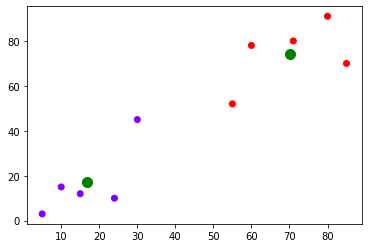

In [19]:
kmeans = KMeans(n_clusters=2)  
kmeans.fit(my_data)  

print(kmeans.cluster_centers_) 
print(kmeans.labels_)  
plt.scatter(my_data['x'],my_data['y'], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], s=100, color='green')

KMeans(n_clusters=3)

[[13.5  10.  ]
 [74.   79.75]
 [42.5  48.5 ]]
[0 0 0 0 2 2 1 1 1 1]


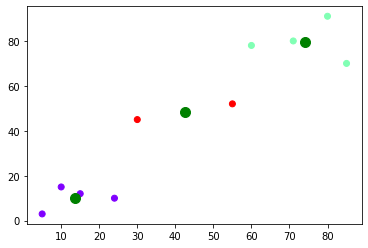

In [20]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(my_data)  

print(kmeans.cluster_centers_) 
print(kmeans.labels_)  
plt.scatter(my_data['x'],my_data['y'], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], s=100, color='green')  

In [21]:
from sklearn.datasets import load_iris

In [22]:
iris = load_iris()

In [23]:
iris.feature_names
iris.data

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [24]:
iris.target_names
iris.target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=3)
kmodel = kmeans.fit(iris.data)

In [26]:
kmodel.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [27]:
kmodel.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [28]:
pd.crosstab(iris.target, kmodel.labels_)

col_0   0   1   2
row_0            
0       0  50   0
1       2   0  48
2      36   0  14

In [29]:
iris_df = pd.DataFrame(iris.data)

iris_df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

iris_df.head(20)

Sepal Length  Sepal Width  Petal Length  Petal Width
0            5.1          3.5           1.4          0.2
1            4.9          3.0           1.4          0.2
2            4.7          3.2           1.3          0.2
3            4.6          3.1           1.5          0.2
4            5.0          3.6           1.4          0.2
5            5.4          3.9           1.7          0.4
6            4.6          3.4           1.4          0.3
7            5.0          3.4           1.5          0.2
8            4.4          2.9           1.4          0.2
9            4.9          3.1           1.5          0.1
10           5.4          3.7           1.5          0.2
11           4.8          3.4           1.6          0.2
12           4.8          3.0           1.4          0.1
13           4.3          3.0           1.1          0.1
14           5.8          4.0           1.2          0.2
15           5.7          4.4           1.5          0.4
16           5.4          3.9           1.3          0.4
17           5.1          3.5           1.4          0.3
18           5.7          3.8           1.7          0.3
19           5.1          3.8           1.5          0.3

In [30]:
iris_target = pd.DataFrame(iris.target)
iris_target.columns = ['Target Species']

In [31]:
iris_target.head(10)

Target Species
0               0
1               0
2               0
3               0
4               0
5               0
6               0
7               0
8               0
9               0

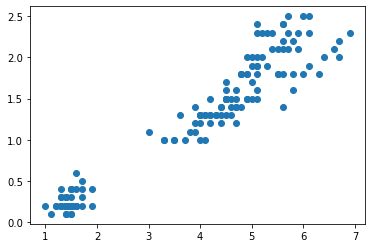

In [32]:
#colormap = np.array['Red', 'Blue', 'Green']
plt.scatter(iris_df['Petal Length'], iris_df['Petal Width'])

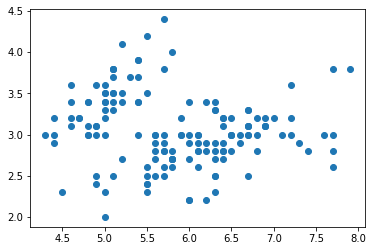

In [33]:
plt.scatter(iris_df['Sepal Length'], iris_df['Sepal Width'])

In [34]:
colormap = np.array(['Red', 'Blue', 'Green'])

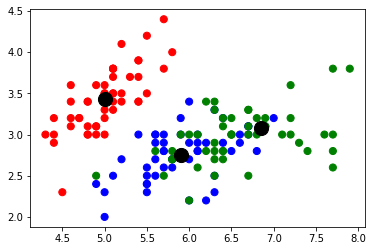

In [35]:
plt.scatter(iris_df['Sepal Length'], iris_df['Sepal Width'], c=colormap[iris.target], s =50)
plt.scatter(kmodel.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'black')

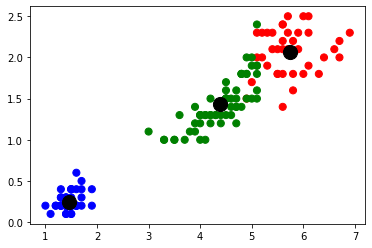

In [36]:
plt.scatter(iris_df['Petal Length'], iris_df['Petal Width'], c=colormap[kmodel.labels_], s =50)
plt.scatter(kmodel.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 200, c = 'black')

## Some real life applications of Clustering

* ### Clustering helps marketers improve their customer base and work on the target areas. It helps group people (according to different criteria’s such as willingness, purchasing power etc.) based on their similarity in many ways related to the product under consideration.
* ### Clustering helps in identification of groups of houses on the basis of their value, type and geographical locations.

* ### Clustering can be used to group the locations of maximum accident prone areas in a city into clusters and define a **Cluster Center** for each cluster, which will be the locations where the **Hospital Emergency Units** will open. These Clusters centers are the centroids of each cluster and are at a minimum distance from all the points of a particular cluster, henceforth, the Emergency Units will be at minimum distance from all the accident prone areas within a cluster.

* ### Let’s consider the data on drug-related crimes in a city. The data consists of crimes due to various drugs that include, Heroin, Cocaine to prescription drugs, especially by underage people. The crimes resulted due to these substance abuse can be brought down by starting de-addiction centres in areas most afflicted by this kind of crime. With the available data, different objectives can be set. They are:

      * Classify the crimes based on the abuse substance to detect prominent cause.
      * Classify the crimes based on age groups.
      * Analyze the data to determine what kinds of de-addiction centre is required.
      * Find out how many de-addiction centres need to be setup to reduce drug related crime rate.